# 1. Introduction

This Telco Customer Churn Exploratory Data Analysis (EDA) tries to investigate factors influencing customer retention in a telecom dataset. We will investigate through visualizations and statistical summaries in order to uncover patterns in customer behavior, identify potential predictors of churn, and offer insights for strategic decision-making in customer retention efforts.

# 2. About the dataset

## 2.1 Load the data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
# the results change everytime the code is executed (random sample)
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5980,7049-GKVZY,Female,0,No,No,17,Yes,No,DSL,Yes,...,No,Yes,Yes,Yes,One year,No,Credit card (automatic),79.85,1387.35,No
165,6345-FZOQH,Male,0,Yes,No,69,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.90,1363.45,No
754,0139-IVFJG,Female,0,Yes,No,2,Yes,No,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,No,Electronic check,90.35,190.5,No
3275,1245-HARPS,Female,0,Yes,No,14,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.40,292.4,No
1093,8659-IOOPU,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,Two year,No,Electronic check,100.45,7159.7,No
2125,8311-UEUAB,Female,0,Yes,Yes,67,Yes,Yes,DSL,Yes,...,No,No,Yes,Yes,Two year,Yes,Electronic check,75.50,5229.45,No
780,5676-CFLYY,Male,0,Yes,Yes,71,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),73.35,5154.5,No
5105,2995-UPRYS,Female,1,Yes,No,40,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),99.20,4062.2,Yes
5284,3317-HRTNN,Female,1,No,No,5,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,45.70,198,Yes
896,8975-SKGRX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.10,8310.55,No


## 2.2 Understanding the Variables

### Based on the info above, we can define there are 20 columns/variables:
1. customerID: A unique identifier for customer.
2. gender: customer gender (Male or Female).
3. SeniorCitizen: whether customer is a senior citizen (1) or not (0).
4. Partner: whether the customer has a partner (Yes or No).
5. Dependents: Whether customer has dependents (Yes or No).
6. tenure: number of months the customer has been with the telecom service.
7. PhoneService: whether the customer has a phone service (Yes or No).
8. MultipleLines: whether customer has multiple phone lines (Yes, No, or No phone service).
9. InternetService: type of internet service the customer has (e.g., Fiber optic, DSL).
10. OnlineSecurity: whether the customer has online security (Yes, No, or No internet service).
11. DeviceProtection: whether the customer has device protection for their services (Yes, No, or No internet service).
12. TechSupport: whether the customer has technical support (Yes, No, or No internet service).
13. StreamingTV: whether the customer has streaming TV services (Yes, No, or No internet service).
14. StreamingMovies: whether the customer has streaming movie services (Yes, No, or No internet service).
15. Contract: type of contract the customer has (e.g., Month-to-month, One year, Two years).
16. PaperlessBilling: whether the customer has opted for paperless billing (Yes or No).
17. PaymentMethod: method the customer uses to pay their bill (e.g., Electronic check, Bank transfer).
18. MonthlyCharges: amount charged to the customer per month.
19. TotalCharges: total amount charged to the customer over their entire tenure.
20. Churn: whether the customer has churned (Yes) or not (No).

In [23]:
# Checkthe data type 
df.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

Majority of columns in this dataset are categorical. Senior Citizen is actually a categorical data, yet it was noted on numerical so the data were seen as integer. We need to manipulate the variable so the column will be categorical. TotalCharges should be numeric, but on the data set, they are still categorical.

# 3. Data Cleaning and Missing-value handling

In [24]:
# Convert 'SeniorCitizen' from Integer to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

# Check the updated data type
print(df['SeniorCitizen'].dtype)

category


In [25]:
# convert TotalCharges from categorical into float
import pandas as pd

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].dtype)

float64


If the "Churn" column has an object data type, I need to convert the values to numeric form (usually 1 for 'Yes' and 0 for 'No') to be able to perform correlation calculations. Ussually variable target if they are an onject data type, need to be converted into binary data. Here are the steps:

In [26]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [27]:
df_copy=df.copy()

In [28]:
# Mmapping 'Yes' as 1 dan 'No' as 0
churn_mapping = {'Yes': 1, 'No': 0}

# change 'Churn' collumn 
df_copy['Churn'] = df_copy['Churn'].map(churn_mapping)

# show the changes
print(df_copy['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


## 3.1 Missing-value handling

In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [30]:
# Check for missing values
print(df_copy.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


ther found missing values in total charges

In [31]:
# Mengecek jumlah nilai yang hilang di kolom "TotalCharges" pada df_copy
missing_values_copy = df_copy['TotalCharges'].isnull().sum()
print(f'Number of mising values in TotalCharges : {missing_values_copy}')


Number of mising values in TotalCharges : 11


In [32]:
# Mencari baris dengan nilai-nilai yang hilang
missing_rows = df_copy[df_copy.isnull().any(axis=1)]

missing_rows


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [33]:
# Delete rows with missing values in "TotalCharges" column
df_copy.dropna(subset=['TotalCharges'], inplace=True)

In [34]:
# veirified deleted missing values
missing_values_after_dropna_copy = df_copy['TotalCharges'].isnull().sum()
f'number of missing values: {missing_values_after_dropna_copy}'

'number of missing values: 0'

## 3.2 Check duplicate¶

In [35]:
# number of duplicated data
df_copy.duplicated().sum()

0

no duplicate data found in this dataset

## 3.3 Outliers

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


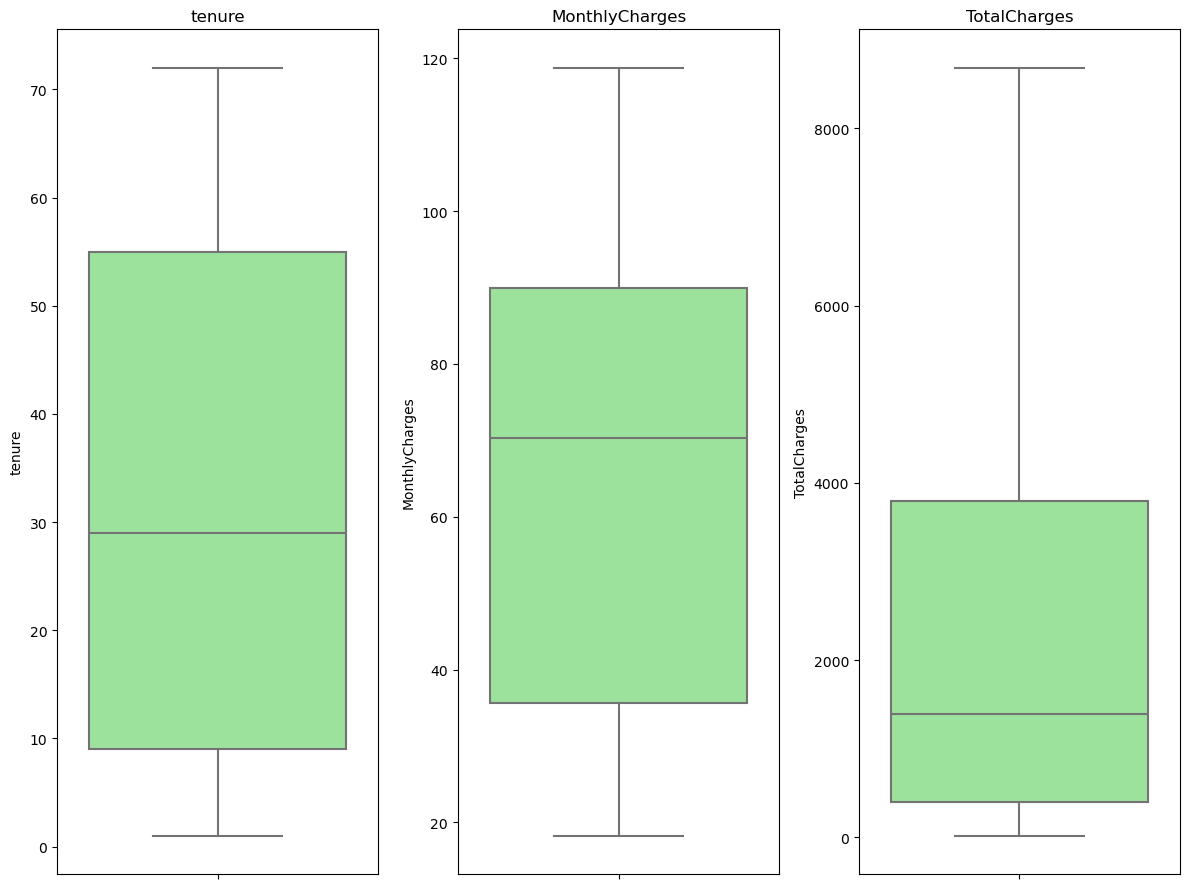

In [36]:

# Identify numerical columns
numericals = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Adjust the figure size for better readability
plt.figure(figsize=(12, 9))

for i in range(len(numericals)):
    plt.subplot(1, len(numericals), i + 1)
    sns.boxplot(y=df_copy[numericals[i]], color='lightgreen')
    plt.title(numericals[i])  # Add feature name as title
    plt.tight_layout()

noo outliers found

# 4. Data Understanding

In [37]:
df_copy[numericals].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


The data shows information about customers' tenure, monthly charges, and total charges. There are 7032 customers in the dataset. The average (mean) tenure is approximately 32.4 months, with a standard deviation of 24.5, indicating some variability. Monthly charges have an average of around 64.8, and the standard deviation is about 30.1. Total charges have a mean of 2283.3, with a standard deviation of 2266.8. The minimum tenure is 1 month, the minimum monthly charge is $18.25, and the minimum total charge is $18.80. The 25th percentile (Q1) represents the lower quartile of the data, with 9 months of tenure, a monthly charge of $35.59, and a total charge of $401.45. The median (50th percentile) values are 29 months for tenure, $70.35 for monthly charges, and $1397.48 for total charges. The 75th percentile (Q3) indicates higher values, with 55 months of tenure, a monthly charge of $89.86, and a total charge of $3794.74. The maximum tenure is 72 months, the maximum monthly charge is $118.75, and the maximum total charge is $8684.80. These statistics provide a summary of the distribution of tenure, monthly charges, and total charges among the customers.

In [38]:
# I devide variables into bigger catgegory in order to easen the analysis
demography = ['gender','SeniorCitizen','Partner', 'Dependents']
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
payment = ['PaperlessBilling','PaymentMethod',]
user_profile = ['tenure','MonthlyCharges','TotalCharges','Churn']

## 4.1 Data Demography 

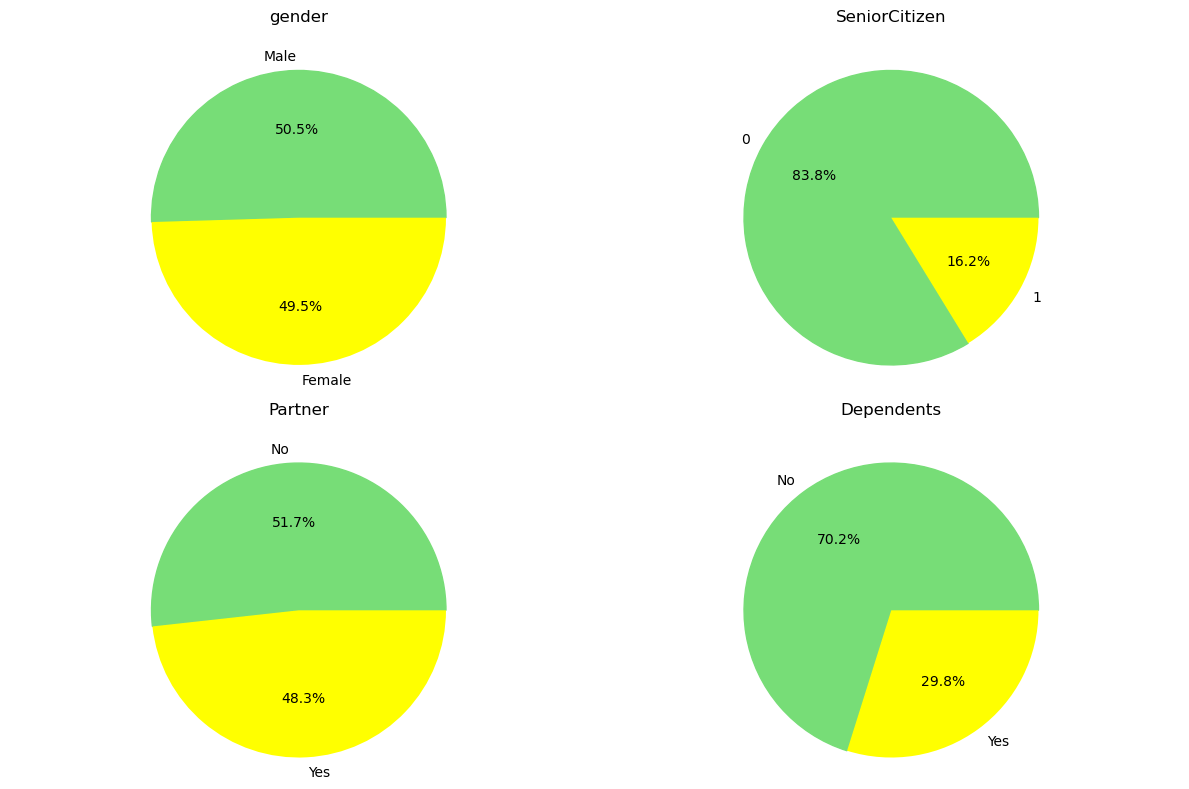

In [39]:
import matplotlib.pyplot as plt

# Set the color palette with pastel green and another color
colors = [plt.cm.Paired.colors[0], 'yellow']  # Using the Paired color map

# Define pastel green color
pastel_green = '#77DD77' 

# Adjust the figure size for better readability
plt.figure(figsize=(12, 8))

# Loop through each categorical column and create a pie chart
for i, column in enumerate(demography, 1):
    plt.subplot(2, 2, i)  # Change the subplot dimensions based on the number of categorical columns
    # Get the pie chart wedges and set their colors
    wedges, texts, autotexts = plt.pie(df_copy[column].value_counts(), labels=df_copy[column].value_counts().index,
                                       autopct='%1.1f%%', colors=colors)
    # Set the color of the first wedge (pastel green)
    wedges[0].set_color(pastel_green)
    # Customize the title and add space
    plt.title(f'{column}', pad=25) # pad for give space between title and chart
    plt.axis('equal')  # Make the pie chart circular

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

The demographic information of customers indicates 50.5% are male and 49.5% are female. Regarding senior citizens, 16.2% of customers fall into this category. In terms of having a partner, 48.3% of customers state they have a partner. A majority of customers, 70%, do not have dependents.


## 4.2 Services

<function matplotlib.pyplot.show(close=None, block=None)>

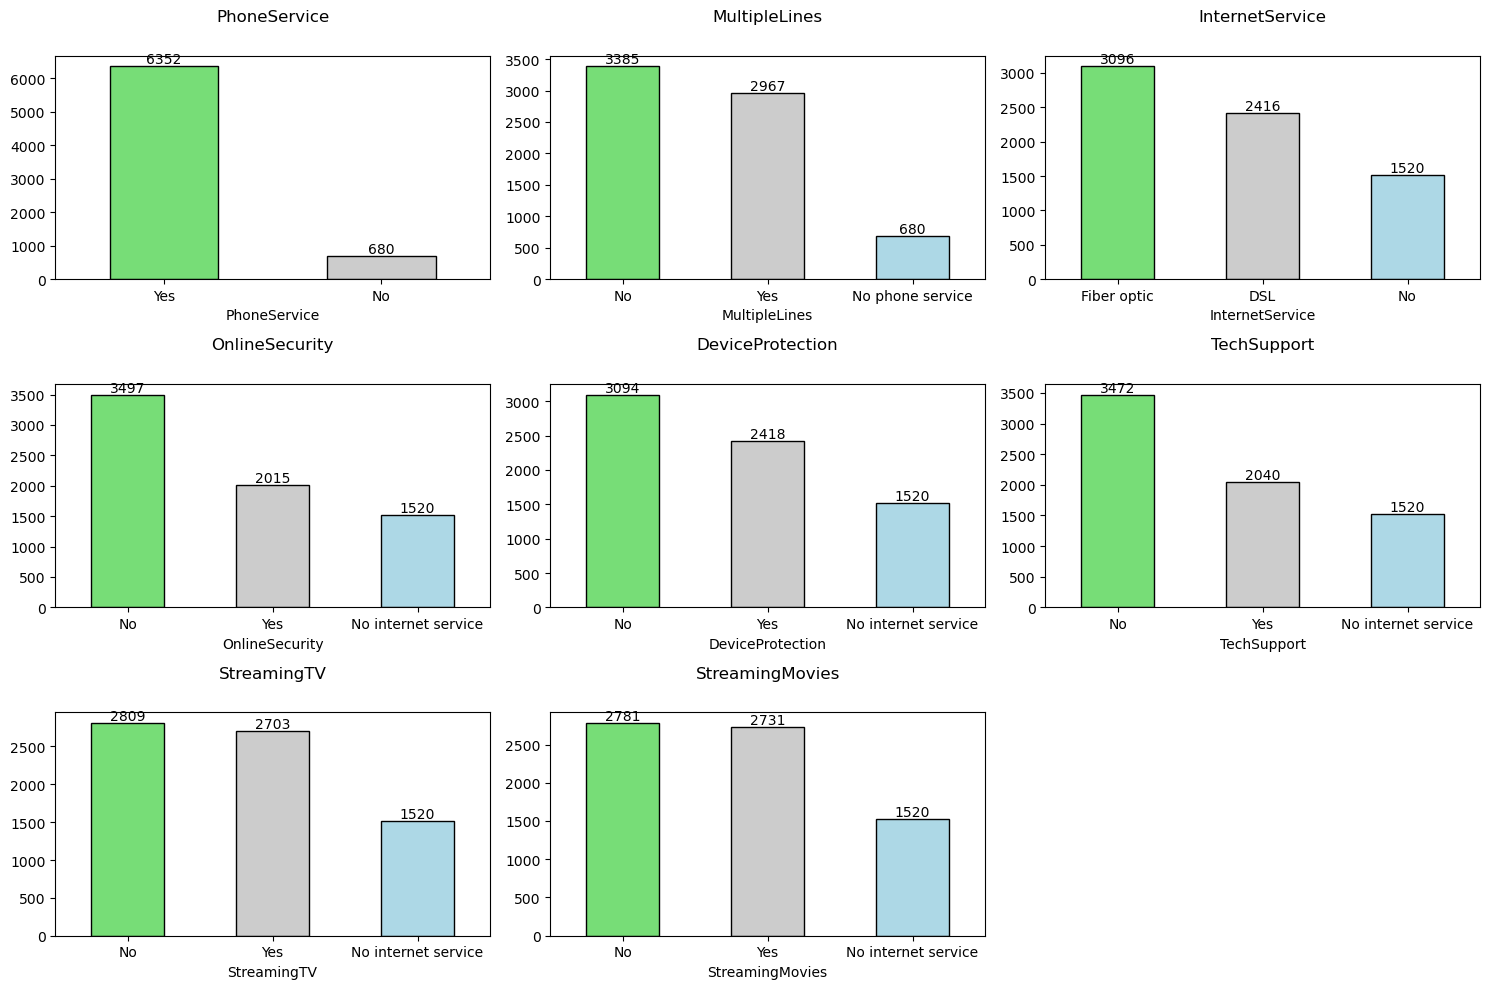

In [40]:
import matplotlib.pyplot as plt

# set colors palete
pastel_green = '#77DD77'
light_gray = '#CCCCCC'
pastel_blue = '#ADD8E6'

# adjust figure size
plt.figure(figsize=(15,10))

# loop each services to create bar charts
for i, service in enumerate(services,1):
    plt.subplot(3,3,i) # change subplot dimension based on number of servies
    counts = df_copy[service].value_counts() # count frequency each values
    counts.plot(kind='bar', color=[pastel_green,light_gray,pastel_blue],edgecolor='black') #plot bar chart
    for index, value in enumerate(counts): # counts the value frequency
        plt.text(index,value +0.5,str(value),ha='center',va='bottom')
    plt.title(f'{service}',pad=25)
    plt.xticks(rotation=0)
    plt.tight_layout()
    
plt.show

I think we should use percentage instead of only the numbers frequency in order to see the different proportion of each category


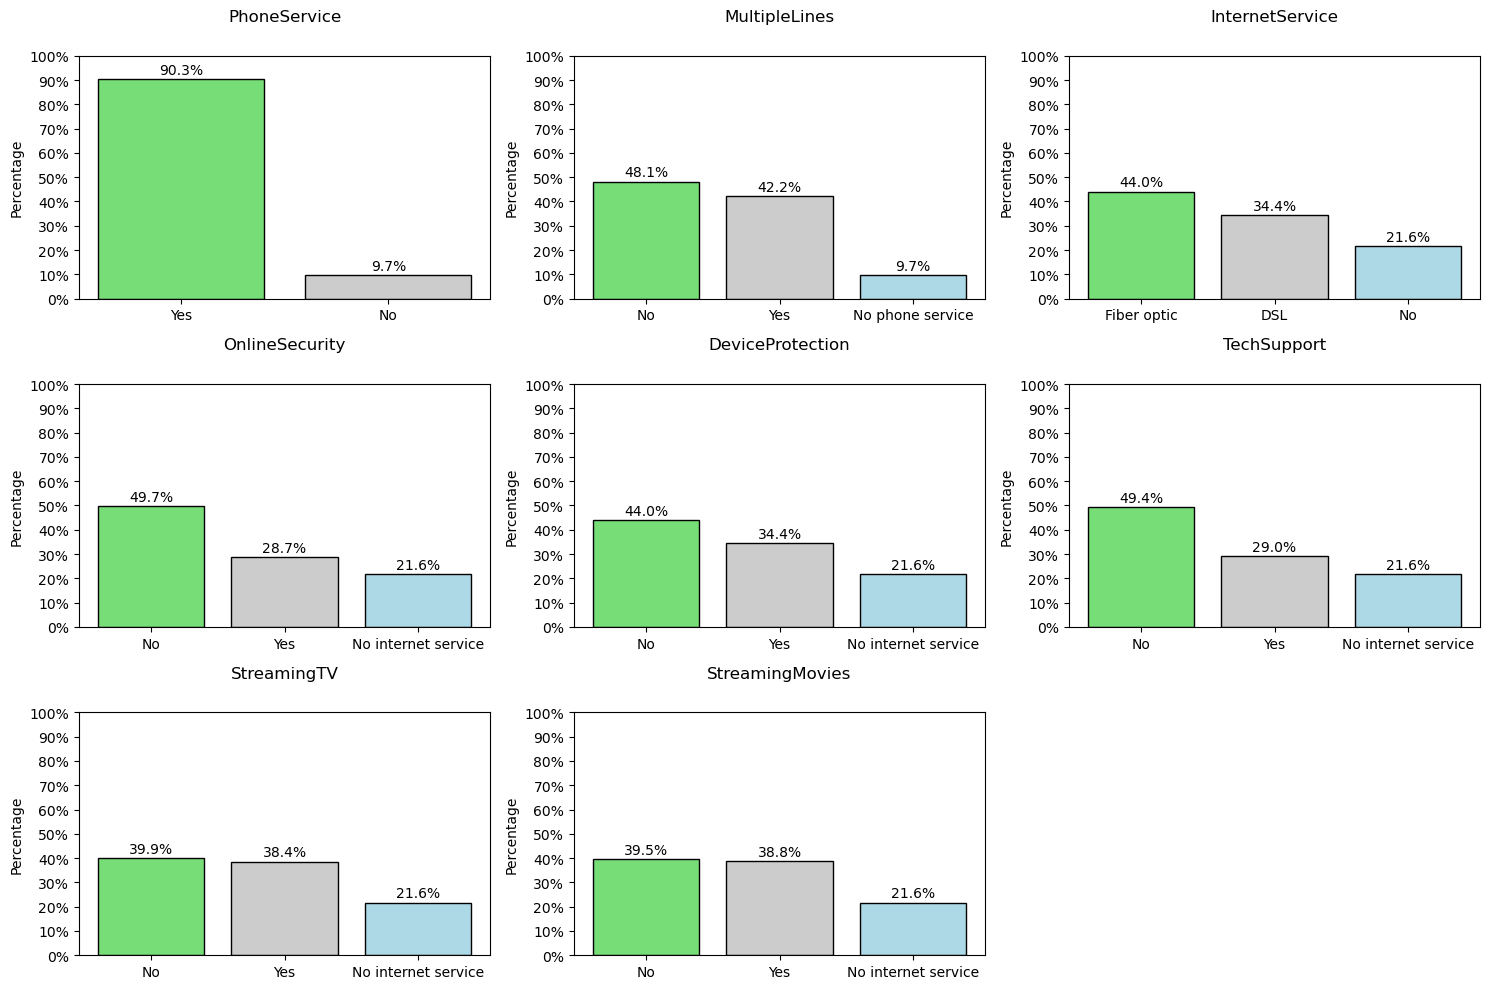

In [41]:
import matplotlib.pyplot as plt

# set colors palete
pastel_green = '#77DD77'
light_gray = '#CCCCCC'
pastel_blue = '#ADD8E6'

# Adjust the figure size for better readability
plt.figure(figsize=(15, 10))

# Loop through each service and create a bar chart
for i, service in enumerate(services, 1):
    plt.subplot(3, 3, i)  # Change the subplot dimensions based on the number of services
    counts = df_copy[service].value_counts() # Count the frequency of each value
    percentages = counts / counts.sum() * 100 # Calculate the percentage for each value
    # Plot the bar chart 
    bars = plt.bar(percentages.index, percentages, color=[pastel_green, light_gray, pastel_blue], edgecolor='black')
    # Add percentage labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom')
    # Customize the title and add space usinng pad
    plt.title(f'{service}', pad=25)
    # Customize y label to show %
    plt.ylabel('Percentage')
    plt.gca().set_ylim([0, 100])  # Set y-axis limit into 100%
    plt.gca().set_yticks(range(0, 101, 10))  # Set y-axis ticks 
    plt.gca().set_yticklabels([f'{tick}%' for tick in range(0, 101, 10)])  # Set y-axis labels
    plt.tight_layout()  # Adjust layout

plt.show()


Finding: Among the customers, 90.3% have phone services, and 42.2% have multiple lines. Regarding internet services, 44% use fiber optic, 34.4% use DSL, while 21.6% do not have internet services. When assessing Online Security, Device Protection, Tech Support, Streaming TV, and Streaming Movies, consistently 21.6% of customers reported not having these services. However, among customers who do have these services, the percentages are as follows: 28.7% for Online Security, 34.4% for Device Protection, 29% for Tech Support, 38.4% for Streaming TV, and 38.8% for Streaming Movies.

## 4.3 Payment

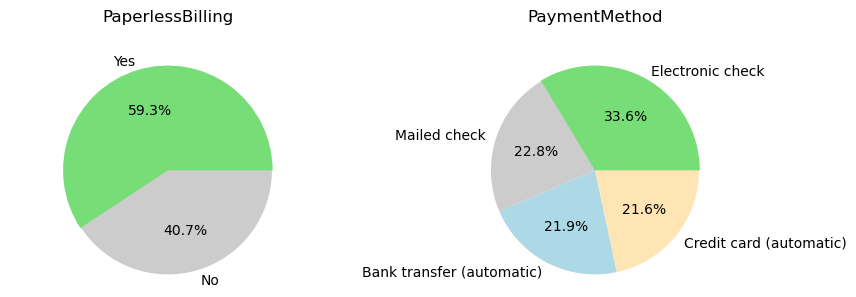

In [42]:
# Set the color palette with pastel green and other colors
pastel_green = '#77DD77'
light_gray = '#CCCCCC'
pastel_blue = '#ADD8E6'
peach = '#FFE5B4'
colors = [pastel_green, light_gray, pastel_blue, peach]

# Adjust the figure size for better readability
plt.figure(figsize=(12, 8))

# Loop through each categorical column and create a pie chartttt
for i, column in enumerate(payment, 1):
    plt.subplot(3, 3, i)  # Change the subplot dimensions based on the number of categorical columns
    # Create the pie chart
    wedges, _, _ = plt.pie(df_copy[column].value_counts(), labels=df[column].value_counts().index,
                            autopct='%1.1f%%', colors=colors)
    # Set the color
    wedges[0].set_color(pastel_green)  # change color
    plt.title(f'{column}', pad=25)  # pad for give space between title and chart
    plt.axis('equal')  # Make the pie chart circular

plt.tight_layout()

# Show the plot
plt.show()

## 4.4 User Profile

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

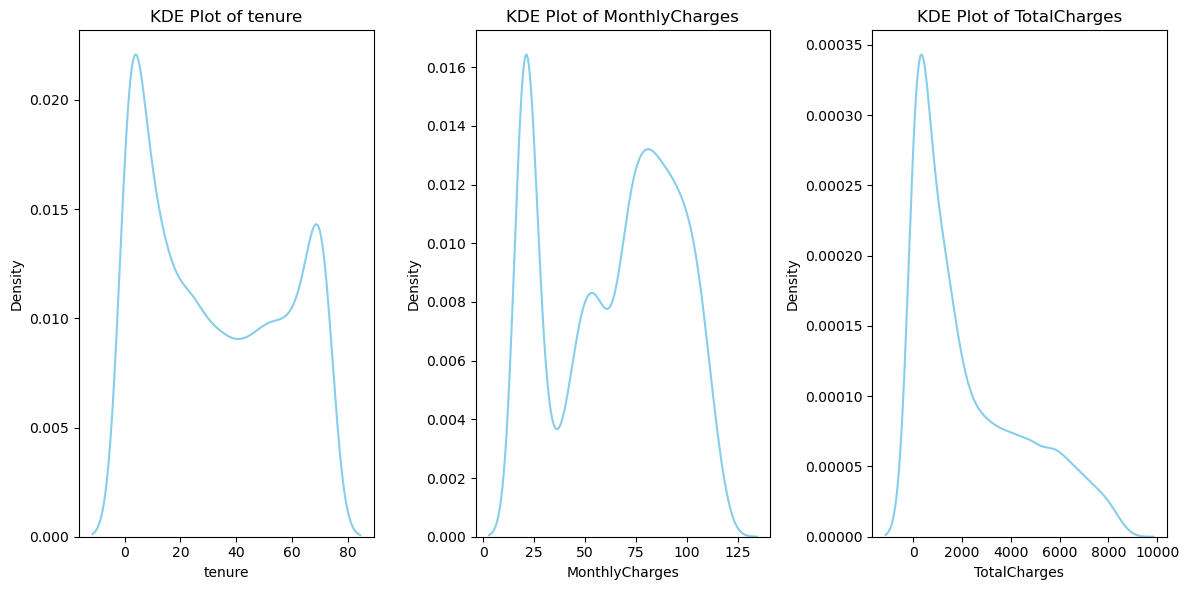

In [43]:
import seaborn as sns

user_profiles = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Check if the specified columns exist in the DataFrame
missing_columns = [col for col in user_profiles if col not in df.columns]
if missing_columns:
    raise ValueError(f"Columns not found in DataFrame: {missing_columns}")

# Adjust the figure size for better readability
plt.figure(figsize=(12, 6))

# Loop through each user profile and create a KDE plot
for i, profile in enumerate(user_profiles, 1):
    plt.subplot(1, len(user_profiles), i)
    sns.kdeplot(x=df_copy[profile], color='skyblue')  # Fix here: use profile instead of user_profiles
    plt.xlabel(profile)
    plt.title(f'KDE Plot of {profile}')  # Fix here: use profile instead of user_profiles

# Show the plot
plt.tight_layout()
plt.show()


1. KDE Plot of Tenure: This plot shows two main peaks, indicating two different groups of customers in terms of subscription length. This could indicate that some customers tend to unsubscribe after a short time, while others remain subscribed for a longer period of time.
2. KDE Plot of MonthlyCharges: This plot shows the distribution of monthly charges charged to customers. There are some peaks that indicate variations in the amount customers pay each month, with some price ranges being more popular than others.
3. KDE Plot of TotalCharges: This plot depicts the distribution of total charges that have been charged to customers during the subscription period. There is a significant decrease in density after high initial values, indicating that most customers have lower total costs, which may indicate shorter subscription times or lower monthly costs.

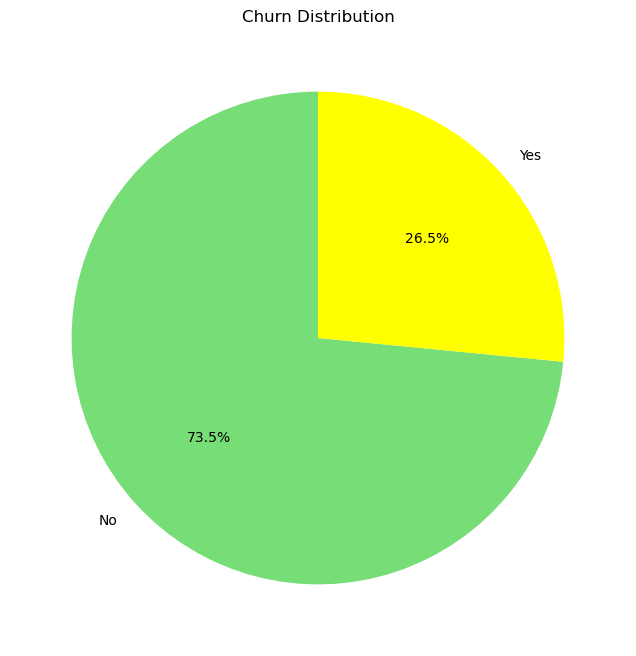

In [44]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the "Churn" column
churn_counts = df['Churn'].value_counts()
# Set the color palette with pastel green and another color
colors = ['#77DD77', 'yellow'] 
# Adjust the figure size for better readability
plt.figure(figsize=(8, 8))
# Create a pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
# Add a title
plt.title('Churn Distribution')
# Show the plot
plt.show()


# 5. Posing Question

## 1. Is there a difference in churn rate between male and female customers?

In [45]:
gender_churn = df_copy.groupby('gender')['Churn'].value_counts(normalize=True).unstack()

# Display the churn rate differences in a table
churn_table = pd.DataFrame({
    'Gender': gender_churn.index,
    'Churn Rate (Yes)': gender_churn[1],
    'Churn Rate (No)': gender_churn[0]
})

churn_table

,Gender,Churn Rate (Yes),Churn Rate (No)
gender,,,
Female,Female,0.269595,0.730405
Male,Male,0.262046,0.737954


The table shows the churn rates for male and female customers. Churn rate represents the percentage of customers who decided to switch services. For females, approximately 27% experienced churn, meaning they switched, while around 73% stayed with the telecom provider. Among males, the churn rate is slightly lower, at about 26%. This suggests the overall difference is quite small.

In [46]:
from scipy.stats import chi2_contingency

contingency_table_gender = pd.crosstab(df_copy['gender'], df_copy['Churn'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table_gender)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("P-Value is significant. There is a significant difference in churn rates between male and female customers.")
else:
    print("P-Value is not significant. There is no significant difference in churn rates between male and female customers.")


Chi-Square Value: 0.47545453727386294
P-Value: 0.4904884707065509
P-Value is not significant. There is no significant difference in churn rates between male and female customers.


Based on the p value (P-Value) obtained (0.490), we do not have enough statistical evidence to reject the null hypothesis. Therefore, we cannot conclude that there is a significant difference in the churn rate between male and female customers based on the observed data.

## 2. How do churn rates differ between senior and non-senior customers?

In [47]:
senior_churn = df_copy.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()

churn_senior_table = pd.DataFrame({
    'Senior Citizen': senior_churn.index,
    'Churn Rate (Yes)': senior_churn[1],
    'Churn Rate (No)': senior_churn[0]
})

churn_senior_table

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15464\2059550101.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  senior_churn = df_copy.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()


,Senior Citizen,Churn Rate (Yes),Churn Rate (No)
SeniorCitizen,,,
0,0,0.236503,0.763497
1,1,0.416813,0.583187


For customers who are not senior citizens (SeniorCitizen=0), approximately 24% experienced churn (switched services), while around 76% remained with the telecom provider. In contrast, for senior citizens (SeniorCitizen=1), the churn rate is higher, at about 42%, with only 58% sticking with the service. This suggests that senior citizens are more likely to churn compared to non-senior customers. 

In [48]:
contingency_table_seniorcitizen = pd.crosstab(df_copy['SeniorCitizen'], df_copy['Churn'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table_seniorcitizen)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("P-Value is significant. There is a significant difference in churn rates between senior citizen and non-senior citizen.")
else:
    print("P-Value is not significant. There is no significant difference in churn rates between ssenior citizen and non-senior citizen .")


Chi-Square Value: 158.4408162893713
P-Value: 2.4792557203954705e-36
P-Value is significant. There is a significant difference in churn rates between senior citizen and non-senior citizen.


Based on the results of the chi-square statistical test, a very small p value (P-Value) was obtained (2.4792557203954705e-36), far below the significance level of 0.05. Therefore, we have strong statistical evidence to reject the null hypothesis. In other words, we can conclude that there is a significant difference in the churn rate between senior and non-senior customers. These results support the claim that senior citizen status significantly influences churn rates in this dataset.

## 3. Does the presence of partners or dependents have a correlation with churn rate?

In [49]:
partner_churn = df_copy.groupby(['Partner', 'Dependents'])['Churn'].value_counts(normalize=True).unstack()

# Display the churn rates based on the presence of partners and dependents in a table
churn_partner_dependents_table = pd.DataFrame({
    'Partner': partner_churn.index.get_level_values('Partner'),
    'Dependents': partner_churn.index.get_level_values('Dependents'),
    'Churn Rate (Yes)': partner_churn[1],
    'Churn Rate (No)': partner_churn[0]
})

churn_partner_dependents_table

Partner Dependents  Churn Rate (Yes)  Churn Rate (No)
Partner Dependents                                                      
No      No              No         No          0.342378         0.657622
        Yes             No        Yes          0.214485         0.785515
Yes     No             Yes         No          0.254083         0.745917
        Yes            Yes        Yes          0.143103         0.856897

The table shows churn rates based on the presence of partners and dependents in a telecom dataset. For customers without partners (No Partner), the churn rate is higher when they also don't have dependents (No Dependents), with around 34% choosing to switch services. In contrast, customers with partners but without dependents have a lower churn rate of approximately 21%, indicating higher loyalty. Interestingly, for customers with partners and dependents, the churn rate drops even further to about 14%, suggesting a strong possibility of retention. The table highlights the impact of relationship status on churn rates, with those having both partners and dependents demonstrating the lowest likelihood of switching telecom services.

In [50]:
contingency_table_partner = pd.crosstab(df_copy['Partner'], df_copy['Churn'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table_partner)
# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("P-Value is significant. There is a significant difference in churn rates between customers with partner and customers with no-partner.")
else:
    print("P-Value is not significant. There is no significant difference in churn rates between customers with partner and customers with no-partner.")


Chi-Square Value: 157.50315146557506
P-Value: 3.97379757451591e-36
P-Value is significant. There is a significant difference in churn rates between customers with partner and customers with no-partner.


In [51]:
contingency_table_dependents = pd.crosstab(df_copy['Dependents'], df_copy['Churn'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table_partner)
# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("P-Value is significant. There is a significant difference in churn rates between customers with dependents and customers with no-dependents.")
else:
    print("P-Value is not significant. There is no significant difference in churn rates between customers with dependents and customers with no-dependents.")


Chi-Square Value: 157.50315146557506
P-Value: 3.97379757451591e-36
P-Value is significant. There is a significant difference in churn rates between customers with dependents and customers with no-dependents.


## 4. Do customers with telephone service or multiple lines tend to have different churn rates?

In [52]:
lines_churn = df_copy.groupby(['PhoneService', 'MultipleLines'])['Churn'].value_counts(normalize=True).unstack().reset_index()

# Display the churn rates based on telephone service and multiple lines in a table
churn_lines_table = pd.DataFrame({
    'Phone Service': lines_churn['PhoneService'],
    'Multiple Lines': lines_churn['MultipleLines'],
    'Churn Rate (Yes)': lines_churn[1],
    'Churn Rate (No)': lines_churn[0]
})

churn_lines_table

,Phone Service,Multiple Lines,Churn Rate (Yes),Churn Rate (No)
0,No,No phone service,0.250000,0.750000
1,Yes,No,0.250812,0.749188
2,Yes,Yes,0.286485,0.713515


Those without phone service, whether or not they have multiple lines doesn't significantly impact the churn rate, both around 25%. However, among customers with phone service, having multiple lines is associated with a slightly higher churn rate of approximately 28.65%, compared to around 25% for those with just one line. This suggests that having multiple lines might contribute slightly to customers deciding to switch services. 

In [53]:
contingency_table_phone = pd.crosstab(df_copy['PhoneService'], df_copy['Churn'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table_phone)
# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("P-Value is significant. There is a significant difference in churn rates between those who have phone services and dont have phone services.")
else:
    print("P-Value is not significant. There is no significant difference in churn rates those who have phone services and dont have phone services.")


Chi-Square Value: 0.8737327674431736
P-Value: 0.34992398942431924
P-Value is not significant. There is no significant difference in churn rates those who have phone services and dont have phone services.


In [54]:
contingency_table_multiplelines = pd.crosstab(df_copy['MultipleLines'], df_copy['Churn'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table_multiplelines)
# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("P-Value is significant. There are significant differences in switching rates among customer having multiple lines.")
else:
    print("P-Value is not significant. There is no significant difference in switching rates among customer having multiple line.")


Chi-Square Value: 11.271540824020612
P-Value: 0.0035679273999811405
P-Value is significant. There are significant differences in switching rates among customer having multiple lines.


## 5. Is the use of TV streaming services or streaming movies related to the tendency to churn?

In [55]:
streaming_churn = df_copy.groupby(['StreamingTV', 'StreamingMovies'])['Churn'].value_counts(normalize=True).unstack().reset_index()

# Display the churn rates based on TV streaming services and streaming movies in a table
churn_streaming_table = pd.DataFrame({
    'Streaming TV': streaming_churn['StreamingTV'],
    'Streaming Movies': streaming_churn['StreamingMovies'],
    'Churn Rate (Yes)': streaming_churn[1],
    'Churn Rate (No)': streaming_churn[0]
})

churn_streaming_table

,Streaming TV,Streaming Movies,Churn Rate (Yes),Churn Rate (No)
0,No,No,0.344571,0.655429
1,No,Yes,0.311869,0.688131
2,No internet service,No internet service,0.074342,0.925658
3,Yes,No,0.318063,0.681937
4,Yes,Yes,0.294482,0.705518


The table shows ustomers abstaining from both TV streaming and movie streaming, the churn rate stands at 34.46%, signifying that 34.46% of these customers chose to switch services, while 65.54% remained loyal. Meanwhile, those who refrain from TV streaming but engage in streaming movies show a slightly lower churn rate of 31.19%. Notably, customers without internet service, and consequently no streaming options, demonstrate a remarkably low churn rate of 7.43%, indicating a high likelihood of retention. On the other hand, customers who utilize TV streaming services, with or without movie streaming, present churn rates ranging from 29.45% to 31.81%. 

In [56]:
from scipy.stats import chi2_contingency

# Create a contingency table for StreamingTV vs. Churn
contingency_table_tv = pd.crosstab(index=df_copy['StreamingTV'], columns=df_copy['Churn'], margins=True)

# Perform chi-square test for StreamingTV vs. Churn
chi2_tv, p_tv, _, _ = chi2_contingency(contingency_table_tv)

# Print the results for StreamingTV vs. Churn
print("Results for StreamingTV vs. Churn:")
print(f"Chi-Square Value: {chi2_tv}")
print(f"P-Value: {p_tv}")
print()

# Create a contingency table for StreamingMovies vs. Churn
contingency_table_movies = pd.crosstab(index=df_copy['StreamingMovies'], columns=df_copy['Churn'], margins=True)

# Perform chi-square test for StreamingMovies vs. Churn
chi2_movies, p_movies, _, _ = chi2_contingency(contingency_table_movies)

# Print the results for StreamingMovies vs. Churn
print("Results for StreamingMovies vs. Churn:")
print(f"Chi-Square Value: {chi2_movies}")
print(f"P-Value: {p_movies}")


Results for StreamingTV vs. Churn:
Chi-Square Value: 372.4565019355074
P-Value: 2.3217923934866624e-77

Results for StreamingMovies vs. Churn:
Chi-Square Value: 374.26843157324595
P-Value: 9.474592884316259e-78


Chi-square test results for 'StreamingTV' vs. 'Churn' and 'StreamingMovies' vs. 'Churn' shows that there is a very significant relationship between the features 'StreamingTV', 'StreamingMovies' and the behavior 'Churn'. The high Chi-Square value and very low p-value (close to zero) indicate that the difference in 'Churn' propensity can be significantly attributed to the 'StreamingTV' and 'StreamingMovies' variables. In other words, customers who use TV streaming or film streaming services have a significantly different 'Churn' tendency compared to customers who do not use these services.

## 6. Does using paperless billing have an impact on churn rate?

In [57]:
billing_churn = df_copy.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack().reset_index()

# Display the churn rates based on paperless billing in a table
churn_billing_table = pd.DataFrame({
    'Paperless Billing': billing_churn['PaperlessBilling'],
    'Churn Rate (Yes)': billing_churn[1],
    'Churn Rate (No)': billing_churn[0]
})

churn_billing_table

,Paperless Billing,Churn Rate (Yes),Churn Rate (No)
0,No,0.163757,0.836243
1,Yes,0.335893,0.664107


For customers who prefer traditional billing (No Paperless Billing), only about 16.38% decided to leave, while the rest (83.62%) stayed. However, for those who go for paperless billing (Yes Paperless Billing), a higher percentage, around 33.59%, chose to switch. So, it seems more people who use paperless billing end up leaving compared to those who stick with traditional billing. This info helps the telecom company figure out how different billing methods might impact whether customers stay or go.

In [58]:
# Create a contingency table for PaperlessBilling and Churn
contingency_table_billing = pd.crosstab(df_copy['PaperlessBilling'], df_copy['Churn'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table_billing)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("P-Value is significant. There is a significant difference in churn rates between paperless and non-paperless billing.")
else:
    print("P-Value is not significant. There is no significant difference in churn rates between paperless and non-paperless billing.")

Chi-Square Value: 256.87490836218717
P-Value: 8.236203353962564e-58
P-Value is significant. There is a significant difference in churn rates between paperless and non-paperless billing.


## 7. Is there a difference in churn rates between the various payment methods used by customers?

In [59]:
payment_churn = df_copy.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().reset_index()

# Display the churn rates based on payment methods in a table
churn_payment_table = pd.DataFrame({
    'Payment Method': payment_churn['PaymentMethod'],
    'Churn Rate (Yes)': payment_churn[1],
    'Churn Rate (No)': payment_churn[0]
})

churn_payment_table

,Payment Method,Churn Rate (Yes),Churn Rate (No)
0,Bank transfer (automatic),0.167315,0.832685
1,Credit card (automatic),0.152531,0.847469
2,Electronic check,0.452854,0.547146
3,Mailed check,0.192020,0.807980


The table shows that the way people pay, especially through electronic checks, seems to have a significant impact on whether they decide to leave or stay with their telecom service. About 16.73% of customers using automatic bank transfers, 15.25% of those using automatic credit card payments, and 19.20% of those using electronic check, chose to leave, and a larger portion of each service stuck around. However, ustomers who pay with electronic checks have a higher churn rate of 45.29%, meaning almost half of them decided to switch services, leaving 54.71% who stayed.

In [60]:
# Create a contingency table for PaymentMethod and Churn
contingency_table_payment = pd.crosstab(df_copy['PaymentMethod'], df_copy['Churn'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table_payment)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("P-Value is significant. There is a significant difference in churn rates among payment methods.")
else:
    print("P-Value is not significant. There is no significant difference in churn rates among payment methods.")


Chi-Square Value: 645.4299001234638
P-Value: 1.4263098511063342e-139
P-Value is significant. There is a significant difference in churn rates among payment methods.


## 8. How does the churn rate pattern relate to the length of time a customer subscribes?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


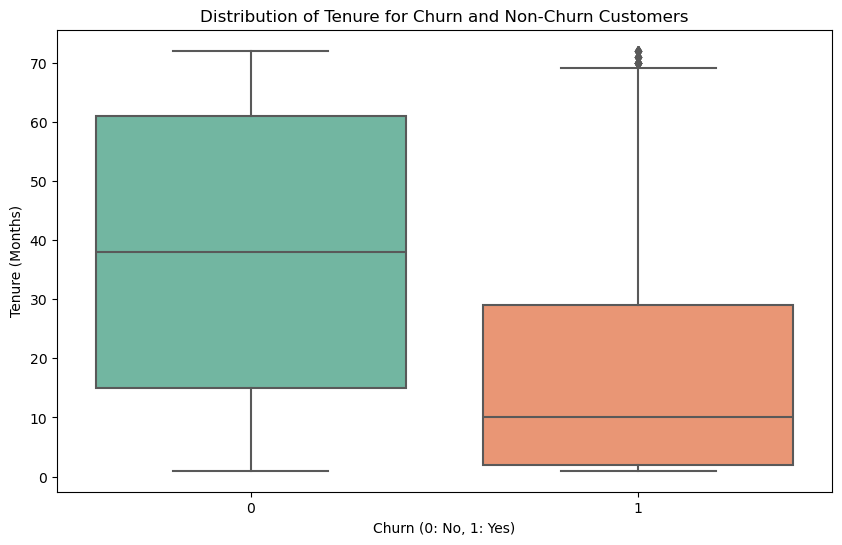

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df_copy, palette='Set2')
plt.title('Distribution of Tenure for Churn and Non-Churn Customers')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Tenure (Months)')
plt.show()

This chart gives us a snapshot of how long customers stayed with the telecom service before deciding whether to leave (Churn = 1) or stay (Churn = 0). On average, the chart shows customers who left had a tenure of approximately 11-12 months, contrasting with those who stayed for about 38 months on average.

In [62]:
churn_stats = df_copy.groupby('Churn')['tenure'].describe().transpose()

churn_stats

Churn,0,1
count,5163.00000,1869.000000
mean,37.65001,17.979133
std,24.07694,19.531123
min,1.00000,1.000000
25%,15.00000,2.000000
50%,38.00000,10.000000
75%,61.00000,29.000000
max,72.00000,72.000000


Based on the stats above he variation in tenure was higher for departing customers, with a difference of around 19 months from the average, compared to 24 months for those who stayed. Both groups had a minimum stay of 1 month and maximum stay of 72 months. The quartiles highlight that a quarter of departing customers left within the first 2 months, while a quarter of staying customers did so within the first 15 months. The median stay for those leaving was 10 months, whereas it was 38 months for those staying. Additionally, 75% of departing customers left within 29 months, while 75% of staying customers did so within 61 months. 

In [63]:
from scipy.stats import ttest_ind

# Split the data into Churn and Non-Churn groups
churn_group_tenure = df_copy[df_copy['Churn'] == 1]['tenure']
non_churn_group_tenure = df_copy[df_copy['Churn'] == 0]['tenure']

# Perform t-test
t_statistic_tenure, p_value_tenure = ttest_ind(churn_group_tenure, non_churn_group_tenure)

# Print the results
print(f"T-Statistic: {t_statistic_tenure}")
print(f"P-Value: {p_value_tenure}")

# Interpret the results
alpha_tenure = 0.05
if p_value_tenure < alpha_tenure:
    print("P-Value is significant. There is a significant difference in Tenure between Churn and Non-Churn customers.")
else:
    print("P-Value is not significant. There is no significant difference in Tenure between Churn and Non-Churn customers.")


T-Statistic: -31.741289063447653
P-Value: 9.437650217574845e-207
P-Value is significant. There is a significant difference in Tenure between Churn and Non-Churn customers.


## 9. Do customers with high monthly costs have different churn rates?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


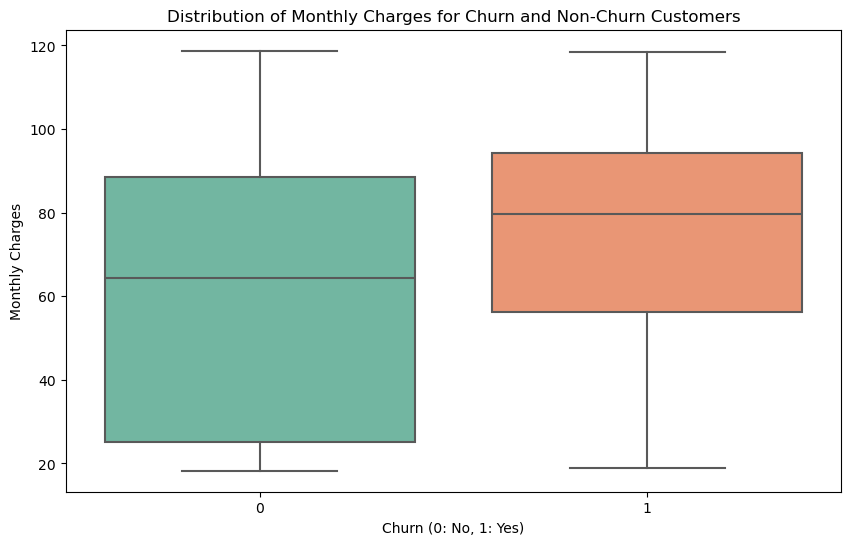

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_copy, palette='Set2')
plt.title('Distribution of Monthly Charges for Churn and Non-Churn Customers')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Monthly Charges')
plt.show()

In [65]:
churn_monthly_charges = df_copy.groupby('Churn')['MonthlyCharges'].describe().transpose()

churn_monthly_charges

Churn,0,1
count,5163.000000,1869.000000
mean,61.307408,74.441332
std,31.094557,24.666053
min,18.250000,18.850000
25%,25.100000,56.150000
50%,64.450000,79.650000
75%,88.475000,94.200000
max,118.750000,118.350000


customers who churn have slightly higher monthly charges (mean $74.44) compared to those who stay (mean $61.31). However, both groups exhibit a wide range of monthly charges, 

In [66]:
from scipy.stats import ttest_ind

# Split the data into Churn and Non-Churn groups
churn_group = df_copy[df_copy['Churn'] == 1]['MonthlyCharges']
non_churn_group = df_copy[df_copy['Churn'] == 0]['MonthlyCharges']

# Perform t-test
t_statistic, p_value = ttest_ind(churn_group, non_churn_group)

# Print the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("P-Value is significant. There is a significant difference in Monthly Charges between Churn and Non-Churn customers.")
else:
    print("P-Value is not significant. There is no significant difference in Monthly Charges between Churn and Non-Churn customers.")


T-Statistic: 16.47959313114872
P-Value: 6.760843117980302e-60
P-Value is significant. There is a significant difference in Monthly Charges between Churn and Non-Churn customers.


## 10. Is the total cost over the course of a subscription related to the likelihood of churn?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


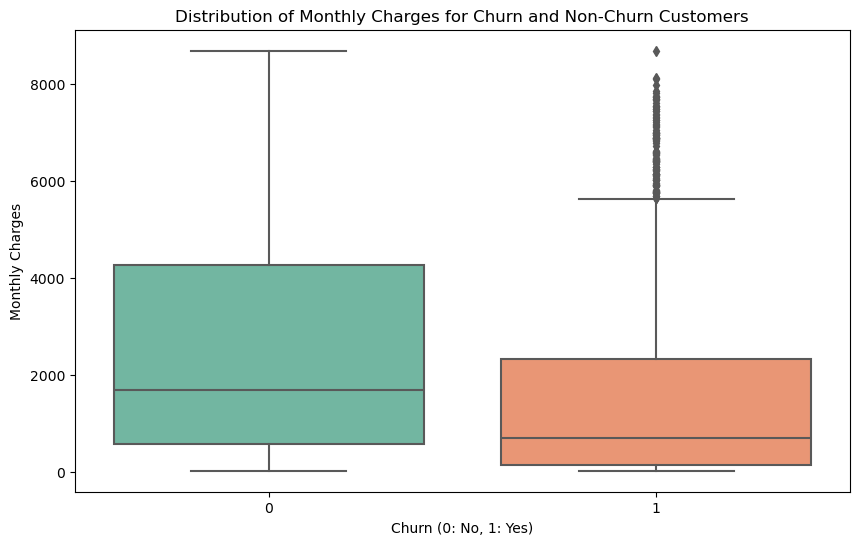

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df_copy, palette='Set2')
plt.title('Distribution of Monthly Charges for Churn and Non-Churn Customers')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Monthly Charges')
plt.show()

In [68]:
churn_total_charges = df_copy.groupby('Churn')['TotalCharges'].describe().transpose()

churn_total_charges

Churn,0,1
count,5163.000000,1869.000000
mean,2555.344141,1531.796094
std,2329.456984,1890.822994
min,18.800000,18.850000
25%,577.825000,134.500000
50%,1683.600000,703.550000
75%,4264.125000,2331.300000
max,8672.450000,8684.800000


On average, customers who churned have substantially lower total charges (mean $1531.80) compared to those who didn't churn (mean $2555.34). The range of total charges is also wider for customers who stayed, indicating greater variability in spending among this group. This suggests that total charges may play a crucial role in customer retention, with lower spending associated with a higher likelihood of churn.

In [69]:
from scipy.stats import ttest_ind

# Split the data into Churn and Non-Churn groups
churn_group_total = df_copy[df_copy['Churn'] == 1]['TotalCharges']
non_churn_group_total = df_copy[df_copy['Churn'] == 0]['TotalCharges']

# Perform t-test
t_statistic_total, p_value_total = ttest_ind(churn_group_total, non_churn_group_total)

# Print the results
print(f"T-Statistic: {t_statistic_total}")
print(f"P-Value: {p_value_total}")

# Interpret the results
alpha_total = 0.05
if p_value_total < alpha_total:
    print("P-Value is significant. There is a significant difference in Total Charges between Churn and Non-Churn customers.")
else:
    print("P-Value is not significant. There is no significant difference in Total Charges between Churn and Non-Churn customers.")


T-Statistic: -17.068827211220274
P-Value: 4.876865689694505e-64
P-Value is significant. There is a significant difference in Total Charges between Churn and Non-Churn customers.


# 6. Multivariat

## 1. What are the patterns and relationships between length of subscription (tenure), monthly costs (MonthlyCharges), total costs (TotalCharges), and customer decisions to stop (Churn) in this dataset?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

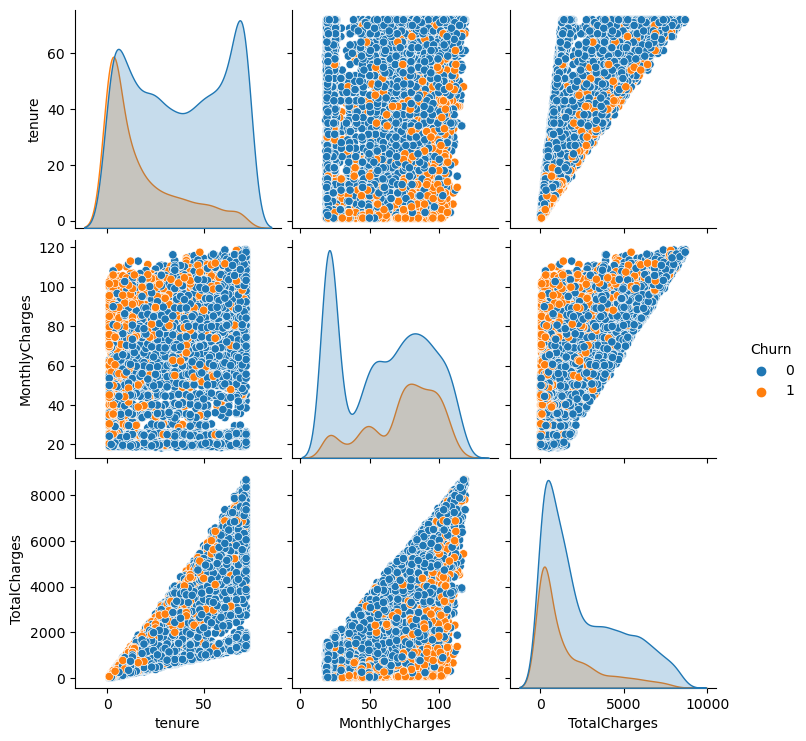

In [70]:
selected_vars = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
subset_df = df_copy[selected_vars]

# Membuat pair plot
sns.pairplot(subset_df, hue='Churn')
plt.show()

The graphic provided is a set of paired density and scatter plots, comparing 'tenure' with 'churn', as well as 'MonthlyCharges' and 'TotalCharges' with 'churn'. Th density plots (on diagonal) show the distribution of each varable for customers who churn (orange) and who do not churn (blue). The scatter plots (off-diagonal) display the relationship between the variables, with the points colored by churn status: blue for no churn (0) and orange for churn (1). The plots above shows tht higher tenure and total charges are associated with a lower probability of churn, while higher monthly charges show a more mixed relationship with churn. The dense clustering of orange points at lower tenure and higher monthly charges could indicate a higher churn risk in newer customers or those with higher monthly costs.

# 7. Conclusion

Overall, a thorough analysis of factors influencing churn provides valuable insights. 
1. From demographic aspects, such as gender and senior citizen status, revealed that gender did not have a significant impact on churn, while being a senior citizen significantly influenced the likelihood of churn.
2. Additionally, the presence of partners and dependents emerged as an important factor, indicating substantial differences in churn rates for customers with and without these relationships.
3. Regarding phone service, multiple lines show significance which indicates variations in churn rates among customers with different phone service configurations. Howeverstreaming services, both TV and movies, show a strong impact on churn rates.
4. The use of paperless billing and diverse payment methods significantly impacts churn rates.
5. Analysis of customer service shows the duration of a customer's subscription plays an important role, with longer service life associated with lower churn rates.
6. Monthly and total costs also matter, with higher costs corresponding to higher churn rates.
7. Multivariate analysis illustrates the complex relationship between service years, monthly costs, total costs, and churn: higher tenure and total charges are associated with a lower probability of churn, while higher monthly charges show a more mixed relationship with churn. There is also higher churn risk in newer customers and those with higher monthly cost.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

NameError: name 'textwrap' is not defined

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


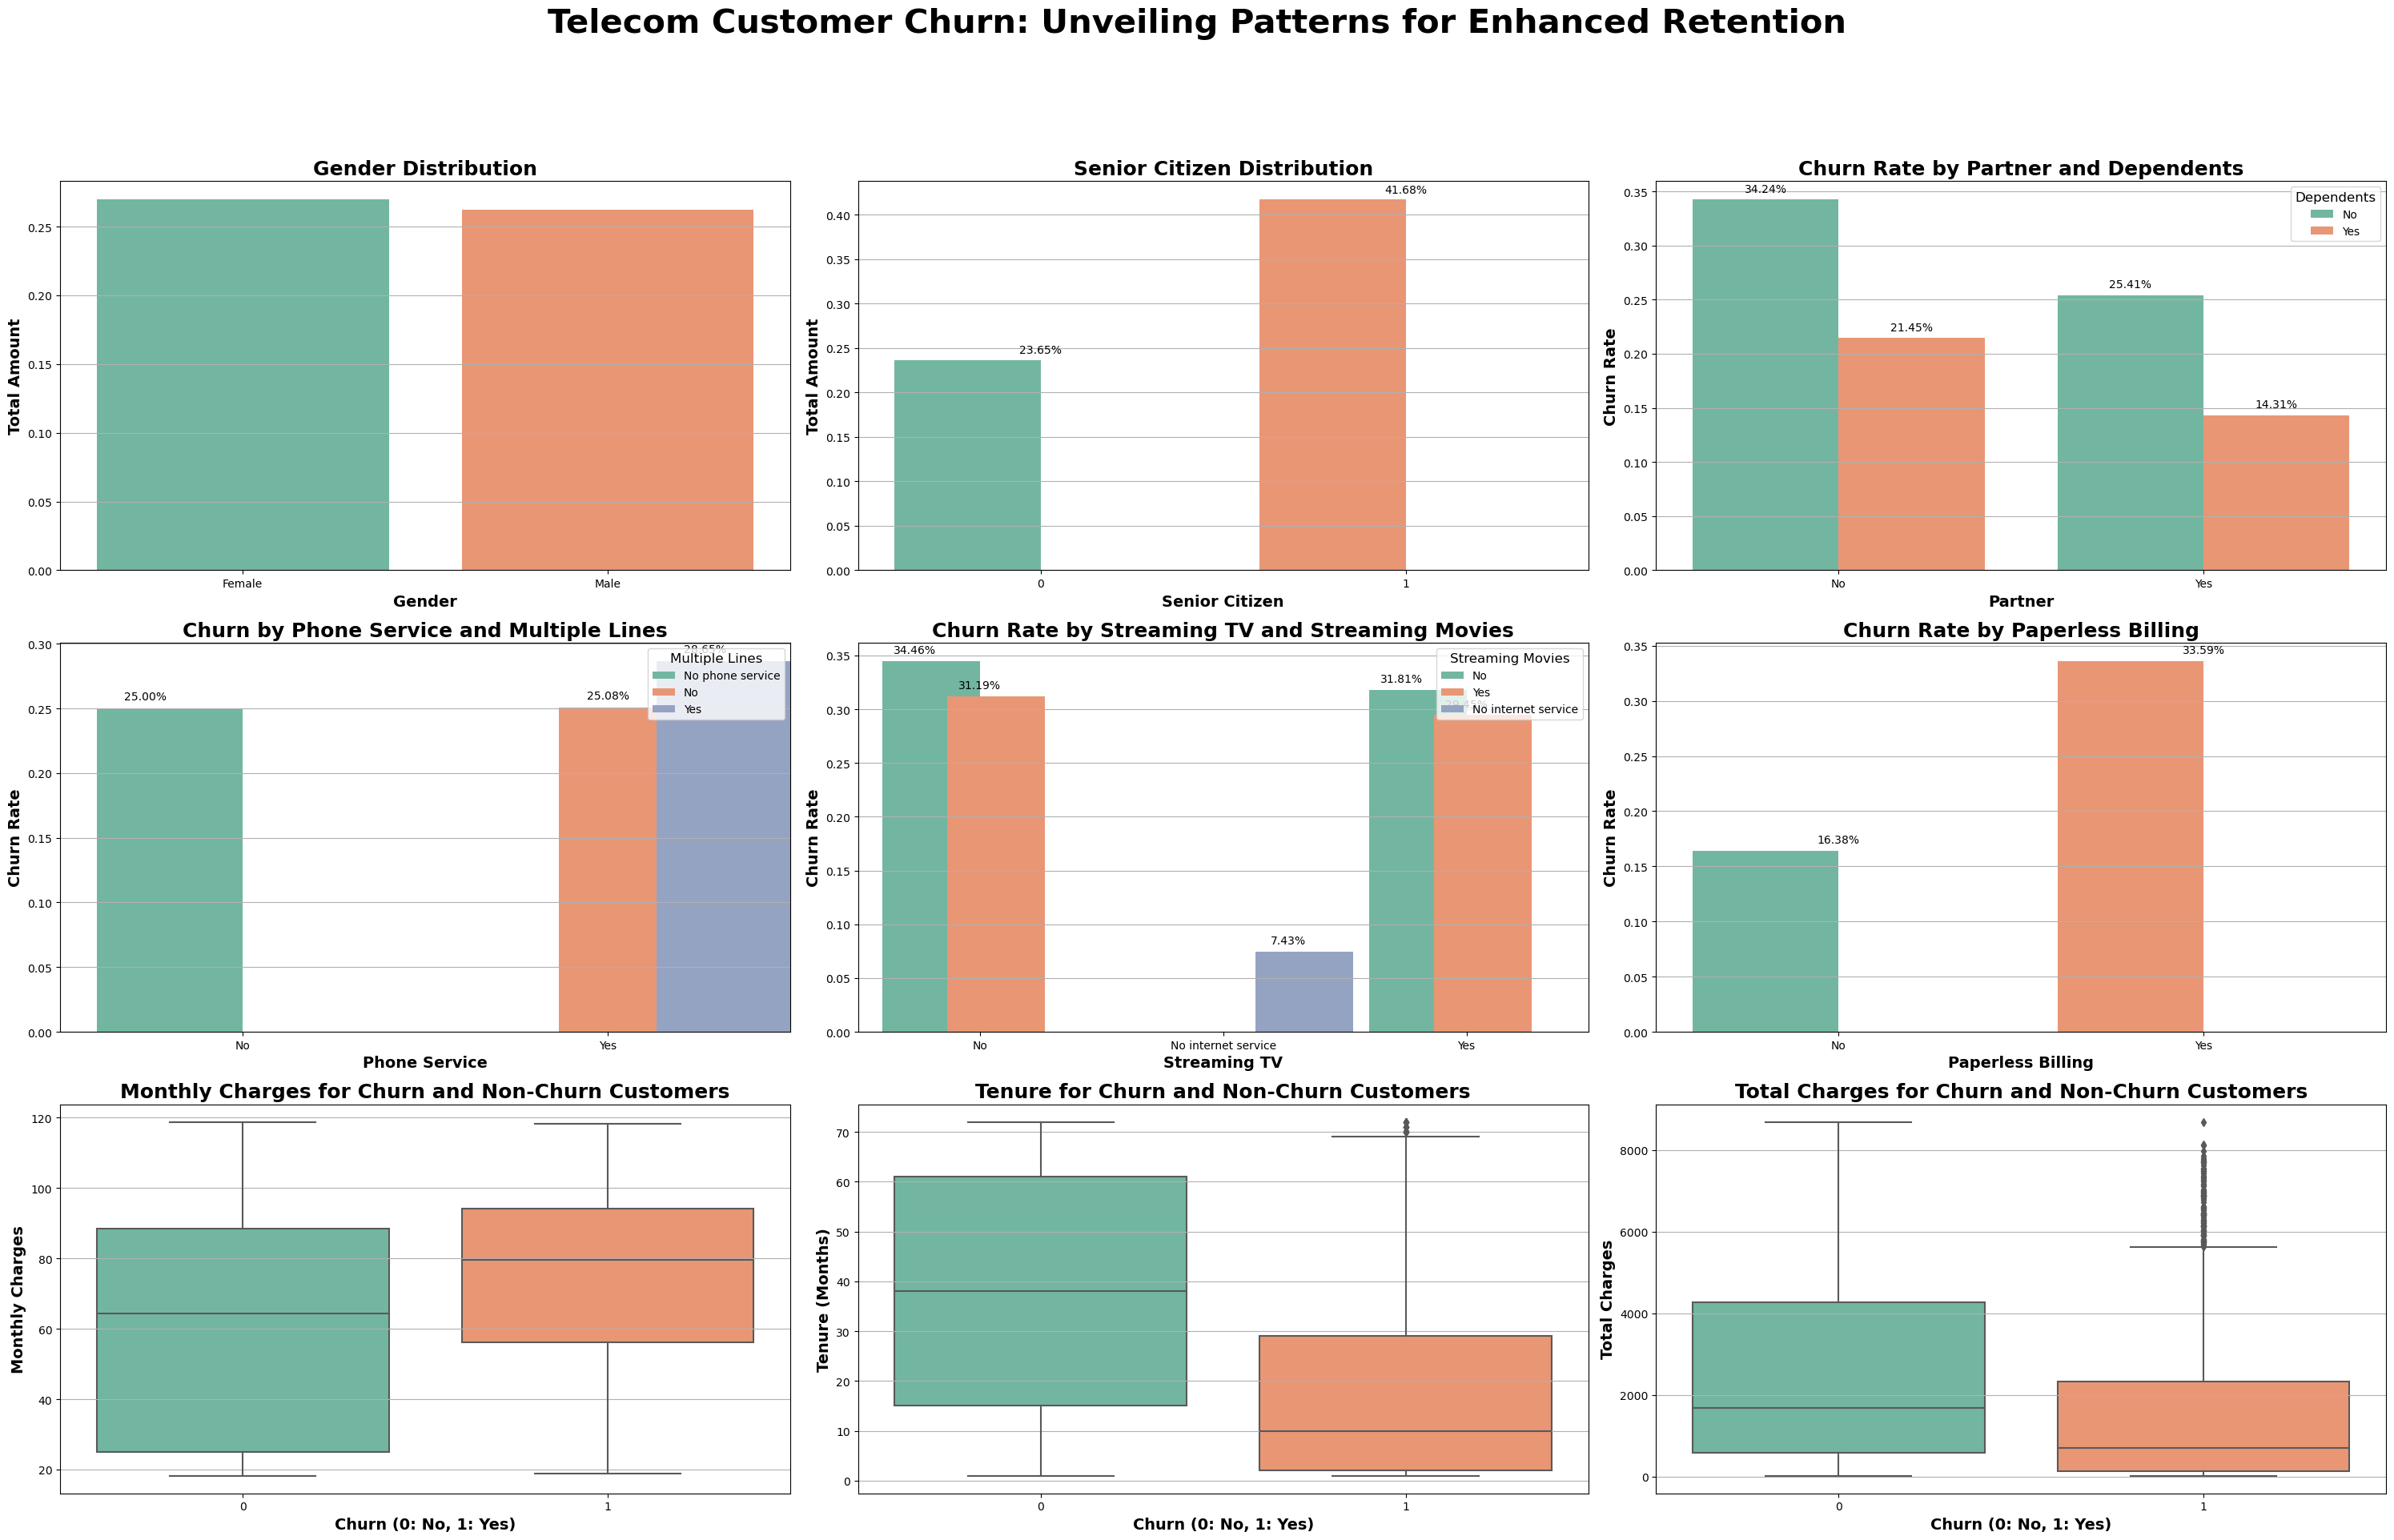

In [77]:
# Create the figure and subplots with 3 rows
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 20), gridspec_kw={'width_ratios': [3, 3, 3]})
fig.suptitle('Telecom Customer Churn: Unveiling Patterns for Enhanced Retention', fontsize=30, fontweight='bold', color='black', backgroundcolor='white', y=0.95, va='center')

# Subplot 1: Churn Rate by Gender
sns.barplot(x='Gender', y='Churn Rate (Yes)', data=churn_table, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Gender Distribution', fontsize=18, fontweight='bold')
axes[0, 0].set_xlabel('Gender', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Total Amount', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y')

# Subplot 2: Churn Rate by Senior Citizen
sns.barplot(x='Senior Citizen', y='Churn Rate (Yes)', data=churn_senior_table, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Senior Citizen Distribution', fontsize=18, fontweight='bold')
axes[0, 1].set_xlabel('Senior Citizen', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Total Amount', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y')

# subplot 3: Churn rate by partner and dependent
sns.barplot(x='Partner', y='Churn Rate (Yes)', hue='Dependents', data=churn_partner_dependents_table, ax=axes[0, 2], palette='Set2')
axes[0, 2].set_title('Churn Rate by Partner and Dependents', fontsize=18, fontweight='bold')
axes[0, 2].set_xlabel('Partner', fontsize=14, fontweight='bold')
axes[0, 2].set_ylabel('Churn Rate', fontsize=14, fontweight='bold')
axes[0, 2].legend(title='Dependents', title_fontsize='12', fontsize='10', loc='upper right')
axes[0, 2].grid(axis='y')

# Display percentage values on top of bars
for p in axes[0, 2].patches:
    height = p.get_height()
    axes[0, 2].text(p.get_x() + p.get_width() / 2., height + 0.005, f'{height * 100:.2f}%', ha='center', va='bottom', fontsize=10)

# Adjust bar width
for bar in axes[0, 2].patches:
    bar.set_width(0.4)

# Display percentage values on top of bars
for p in axes[0, 1].patches:
    height = p.get_height()
    axes[0, 1].text(p.get_x() + p.get_width() / 2., height + 0.005, f'{height * 100:.2f}%', ha='center', va='bottom', fontsize=10)

# Adjust bar width
for bar in axes[0, 1].patches:
    bar.set_width(0.4)
    
# Subplot 4: Churn Rate by Phone Service and Multiple Lines
sns.barplot(x='Phone Service', y='Churn Rate (Yes)', hue='Multiple Lines', data=churn_lines_table, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Churn by Phone Service and Multiple Lines', fontsize=18, fontweight='bold')
axes[1, 0].set_xlabel('Phone Service', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Churn Rate', fontsize=14, fontweight='bold')
axes[1, 0].legend(title='Multiple Lines', title_fontsize='12', fontsize='10', loc='upper right')
axes[1, 0].grid(axis='y')

# Display percentage values on top of bars
for p in axes[1, 0].patches:
    height = p.get_height()
    axes[1, 0].text(p.get_x() + p.get_width() / 2., height + 0.005, f'{height * 100:.2f}%', ha='center', va='bottom', fontsize=10)

# Adjust bar width
for bar in axes[1, 0].patches:
    bar.set_width(0.4)

# Subplot 5: Churn Rate by Streaming TV and Streaming Movies
sns.barplot(x='Streaming TV', y='Churn Rate (Yes)', hue='Streaming Movies', data=churn_streaming_table, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Churn Rate by Streaming TV and Streaming Movies', fontsize=18, fontweight='bold')
axes[1, 1].set_xlabel('Streaming TV', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Churn Rate', fontsize=14, fontweight='bold')
axes[1, 1].legend(title='Streaming Movies', title_fontsize='12', fontsize='10', loc='upper right')
axes[1, 1].grid(axis='y')

# Display percentage values on top of bars
for p in axes[1, 1].patches:
    height = p.get_height()
    axes[1, 1].text(p.get_x() + p.get_width() / 2., height + 0.005, f'{height * 100:.2f}%', ha='center', va='bottom', fontsize=10)

# Adjust bar width
for bar in axes[1, 1].patches:
    bar.set_width(0.4)


# Subplot 6: Churn Rate by Paperless Billing
sns.barplot(x='Paperless Billing', y='Churn Rate (Yes)', data=churn_billing_table, ax=axes[1, 2], palette='Set2')
axes[1, 2].set_title('Churn Rate by Paperless Billing', fontsize=18, fontweight='bold')
axes[1, 2].set_xlabel('Paperless Billing', fontsize=14, fontweight='bold')
axes[1, 2].set_ylabel('Churn Rate', fontsize=14, fontweight='bold')
axes[1, 2].grid(axis='y')

# Display percentage values on top of bars
for p in axes[1, 2].patches:
    height = p.get_height()
    axes[1, 2].text(p.get_x() + p.get_width() / 2., height + 0.005, f'{height * 100:.2f}%', ha='center', va='bottom', fontsize=10)

# Adjust bar width
for bar in axes[1, 2].patches:
    bar.set_width(0.4)
    
# Subplot 7: Boxplot of Monthly Charges by Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_copy, palette='Set2', ax=axes[2, 0])
axes[2, 0].set_title('Monthly Charges for Churn and Non-Churn Customers', fontsize=18, fontweight='bold')
axes[2, 0].set_xlabel('Churn (0: No, 1: Yes)', fontsize=14, fontweight='bold')
axes[2, 0].set_ylabel('Monthly Charges', fontsize=14, fontweight='bold')
axes[2, 0].grid(axis='y')


# Subplot 8: Boxplot of Tenure by Churn
sns.boxplot(x='Churn', y='tenure', data=df_copy, palette='Set2', ax=axes[2, 1])
axes[2, 1].set_title('Tenure for Churn and Non-Churn Customers', fontsize=18, fontweight='bold')
axes[2, 1].set_xlabel('Churn (0: No, 1: Yes)', fontsize=14, fontweight='bold')
axes[2, 1].set_ylabel('Tenure (Months)', fontsize=14, fontweight='bold')
axes[2, 1].grid(axis='y')

# Subplot 9: Boxplot of Total Charges by Churn
sns.boxplot(x='Churn', y='TotalCharges', data=df_copy, palette='Set2', ax=axes[2, 2])
axes[2, 2].set_title('Total Charges for Churn and Non-Churn Customers', fontsize=18, fontweight='bold')
axes[2, 2].set_xlabel('Churn (0: No, 1: Yes)', fontsize=14, fontweight='bold')
axes[2, 2].set_ylabel('Total Charges', fontsize=14, fontweight='bold')
axes[2, 2].grid(axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.9])

# Calculate the position for the conclusion text
conclusion_position = axes[-1, -1].get_position()
conclusion_height = conclusion_position.y0 - (0.18) 

# Add conclusion text below all subplots
conclusion_text = """
Our analysis of telecom customer churn reveals several key insights:
1. Gender does not significantly impact churn rates, as indicated by a non-significant p-value (0.4905).
2. Senior citizens exhibit a substantial difference in churn rates compared to non-senior customers (p-value < 0.05), emphasizing the need for targeted retention strategies.
3. Customers with partners or dependents are less likely to churn, supported by significant p-values (p-value < 0.05).
4. Phone service alone doesn't influence churn, but the presence of multiple lines affects churn rates significantly (p-value < 0.05).
5. Streaming TV and Streaming Movies both contribute significantly to churn, emphasizing the role of content services in customer retention.
6. Paperless billing and payment methods significantly impact churn, requiring focused strategies for each.
7. Tenure, Monthly Charges, and Total Charges exhibit significant differences between churn and non-churn customers (p-value < 0.05), suggesting a correlation with loyalty and financial considerations.
8. A multivariate exploration demonstrates complex interactions between tenure, monthly charges, and total charges, offering deeper insights for targeted interventions.

These findings provide a foundation for implementing personalized retention strategies and improving customer satisfaction."""

# Add conclusion text below all subplots
fig.text(0.02, conclusion_height, textwrap.dedent(conclusion_text), fontsize=25, va='center', ha='left')
plt.tight_layout()

# Show the plot
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

NameError: name 'textwrap' is not defined

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


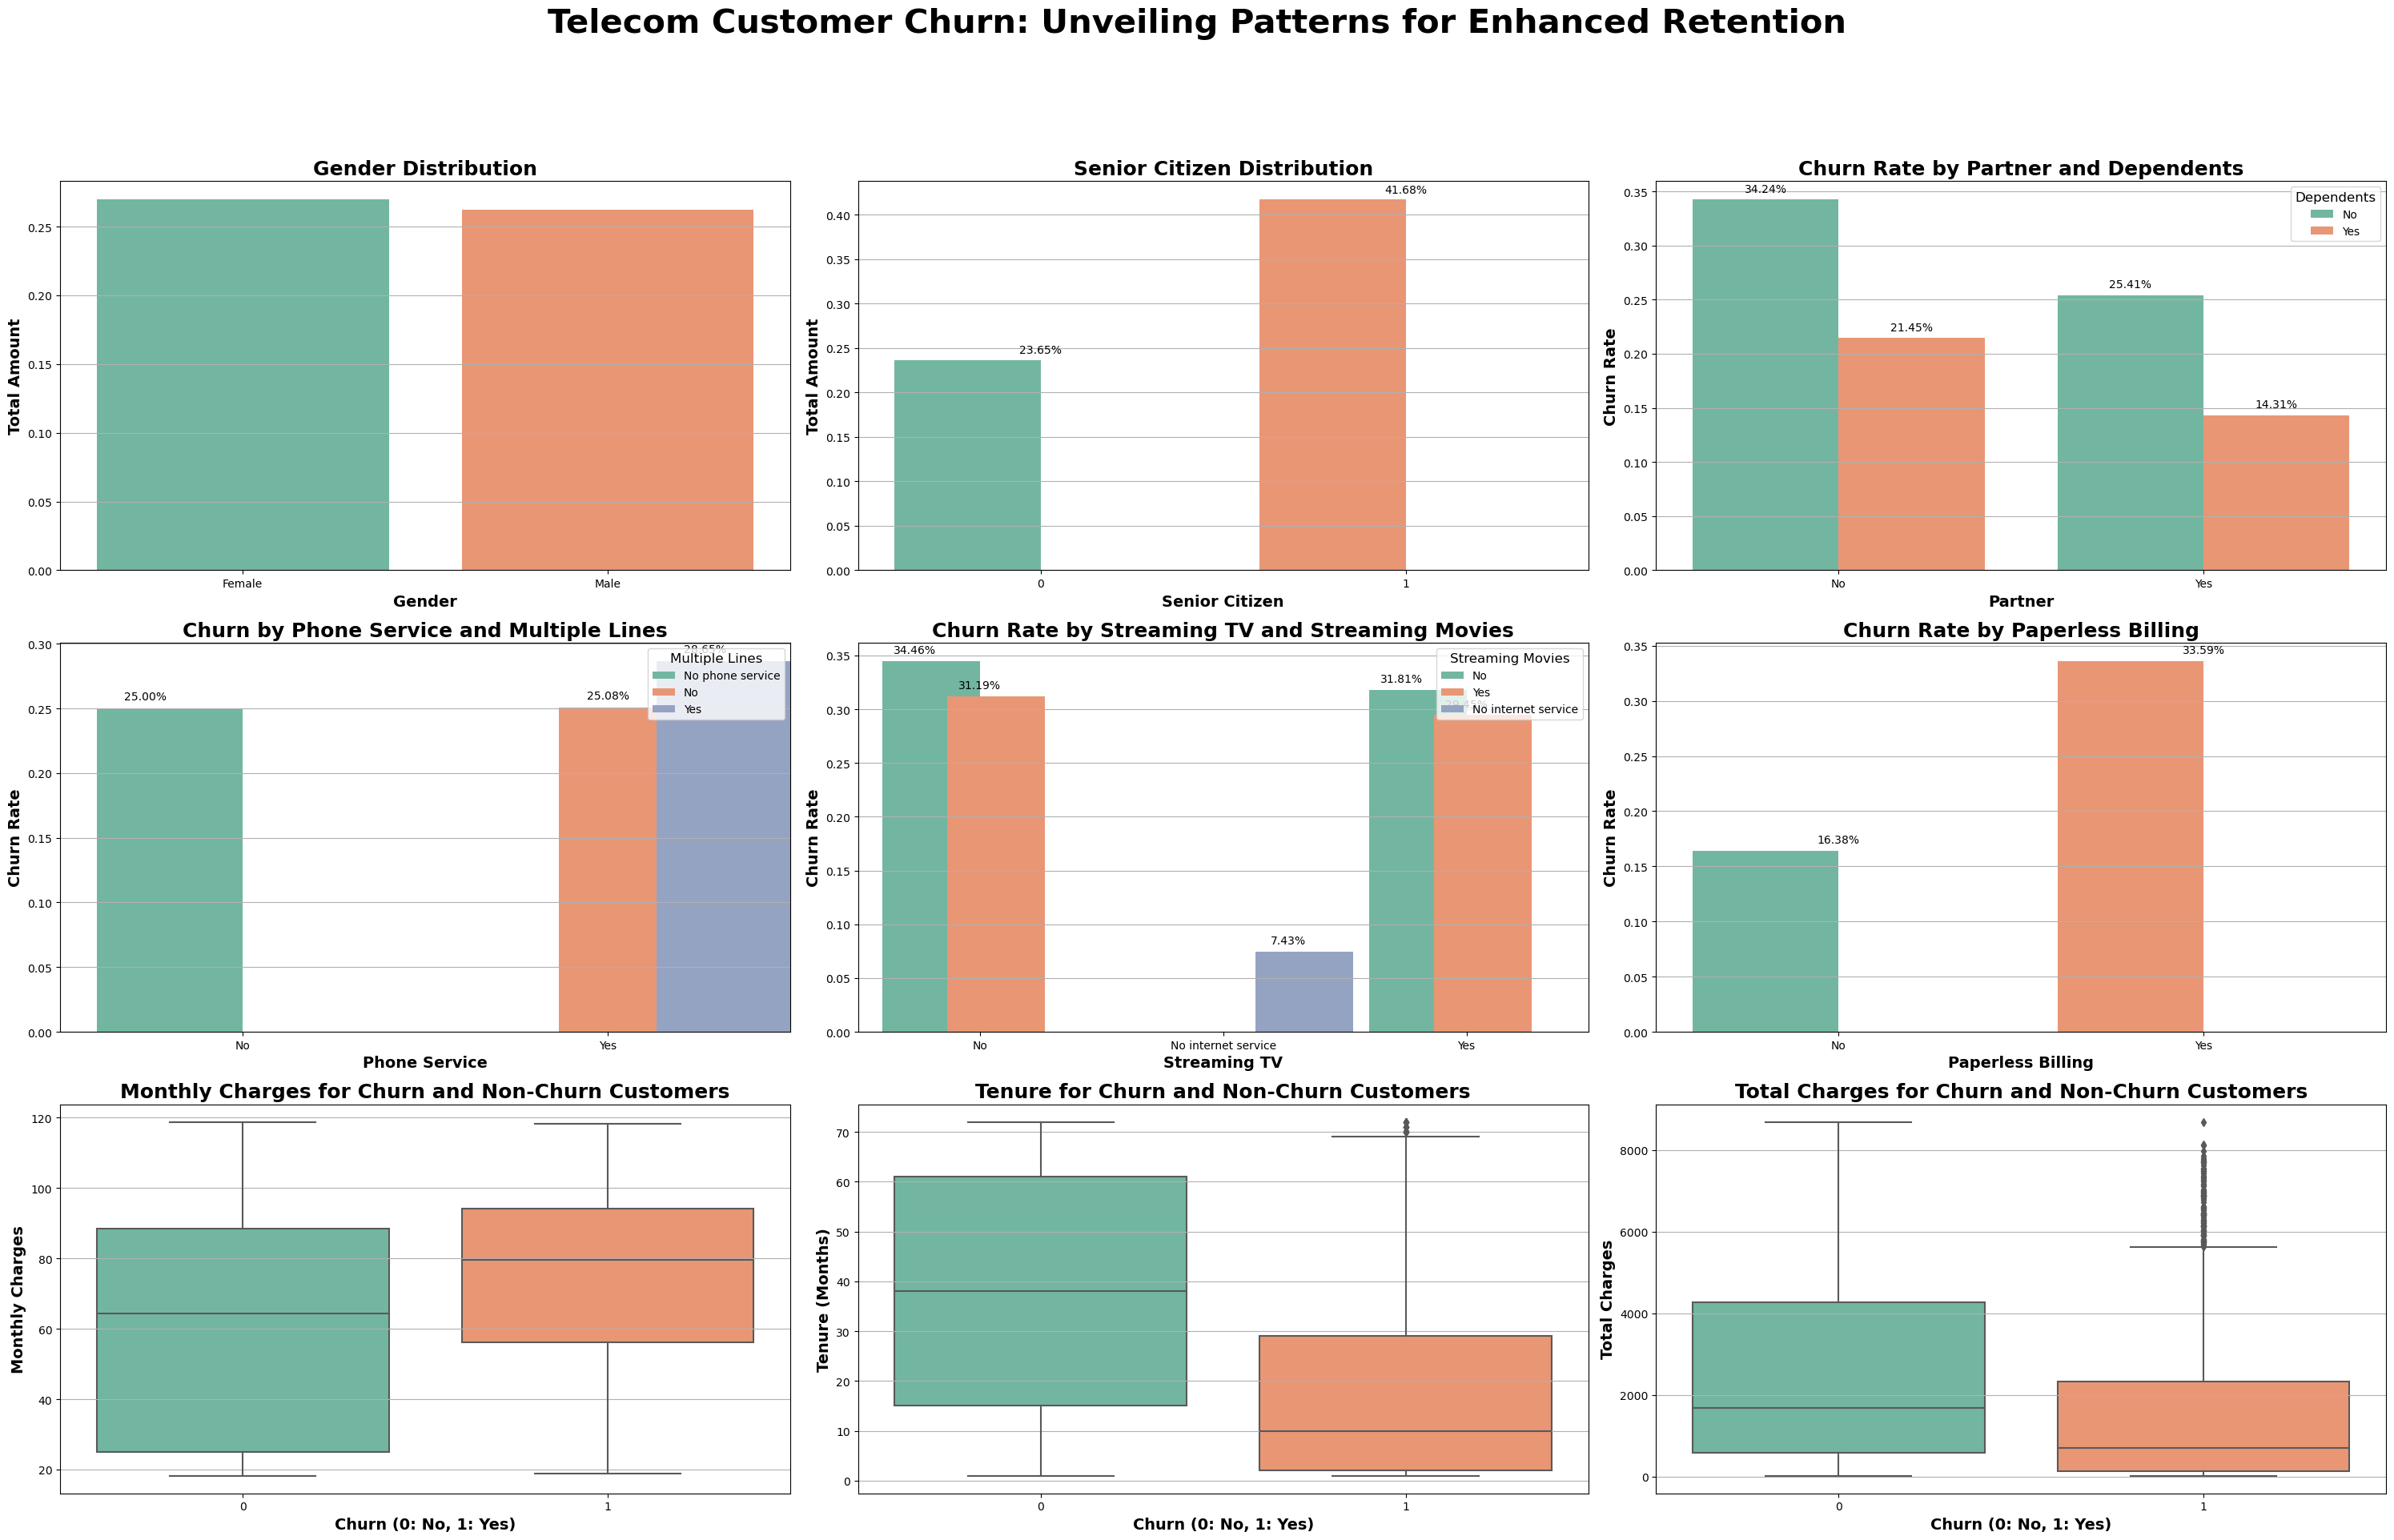

In [76]:
# Create the figure and subplots with 3 rows
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 20), gridspec_kw={'width_ratios': [3, 3, 3]})
fig.suptitle('Telecom Customer Churn: Unveiling Patterns for Enhanced Retention', fontsize=30, fontweight='bold', color='black', backgroundcolor='white', y=0.95, va='center')

# Subplot 1: Churn Rate by Gender
sns.barplot(x='Gender', y='Churn Rate (Yes)', data=churn_table, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Gender Distribution', fontsize=18, fontweight='bold')
axes[0, 0].set_xlabel('Gender', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Total Amount', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y')

# Subplot 2: Churn Rate by Senior Citizen
sns.barplot(x='Senior Citizen', y='Churn Rate (Yes)', data=churn_senior_table, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Senior Citizen Distribution', fontsize=18, fontweight='bold')
axes[0, 1].set_xlabel('Senior Citizen', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Total Amount', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y')

# subplot 3: Churn rate by partner and dependent
sns.barplot(x='Partner', y='Churn Rate (Yes)', hue='Dependents', data=churn_partner_dependents_table, ax=axes[0, 2], palette='Set2')
axes[0, 2].set_title('Churn Rate by Partner and Dependents', fontsize=18, fontweight='bold')
axes[0, 2].set_xlabel('Partner', fontsize=14, fontweight='bold')
axes[0, 2].set_ylabel('Churn Rate', fontsize=14, fontweight='bold')
axes[0, 2].legend(title='Dependents', title_fontsize='12', fontsize='10', loc='upper right')
axes[0, 2].grid(axis='y')

# Display percentage values on top of bars
for p in axes[0, 2].patches:
    height = p.get_height()
    axes[0, 2].text(p.get_x() + p.get_width() / 2., height + 0.005, f'{height * 100:.2f}%', ha='center', va='bottom', fontsize=10)

# Adjust bar width
for bar in axes[0, 2].patches:
    bar.set_width(0.4)

# Display percentage values on top of bars
for p in axes[0, 1].patches:
    height = p.get_height()
    axes[0, 1].text(p.get_x() + p.get_width() / 2., height + 0.005, f'{height * 100:.2f}%', ha='center', va='bottom', fontsize=10)

# Adjust bar width
for bar in axes[0, 1].patches:
    bar.set_width(0.4)
    
# Subplot 4: Churn Rate by Phone Service and Multiple Lines
sns.barplot(x='Phone Service', y='Churn Rate (Yes)', hue='Multiple Lines', data=churn_lines_table, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Churn by Phone Service and Multiple Lines', fontsize=18, fontweight='bold')
axes[1, 0].set_xlabel('Phone Service', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Churn Rate', fontsize=14, fontweight='bold')
axes[1, 0].legend(title='Multiple Lines', title_fontsize='12', fontsize='10', loc='upper right')
axes[1, 0].grid(axis='y')

# Display percentage values on top of bars
for p in axes[1, 0].patches:
    height = p.get_height()
    axes[1, 0].text(p.get_x() + p.get_width() / 2., height + 0.005, f'{height * 100:.2f}%', ha='center', va='bottom', fontsize=10)

# Adjust bar width
for bar in axes[1, 0].patches:
    bar.set_width(0.4)

# Subplot 5: Churn Rate by Streaming TV and Streaming Movies
sns.barplot(x='Streaming TV', y='Churn Rate (Yes)', hue='Streaming Movies', data=churn_streaming_table, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Churn Rate by Streaming TV and Streaming Movies', fontsize=18, fontweight='bold')
axes[1, 1].set_xlabel('Streaming TV', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Churn Rate', fontsize=14, fontweight='bold')
axes[1, 1].legend(title='Streaming Movies', title_fontsize='12', fontsize='10', loc='upper right')
axes[1, 1].grid(axis='y')

# Display percentage values on top of bars
for p in axes[1, 1].patches:
    height = p.get_height()
    axes[1, 1].text(p.get_x() + p.get_width() / 2., height + 0.005, f'{height * 100:.2f}%', ha='center', va='bottom', fontsize=10)

# Adjust bar width
for bar in axes[1, 1].patches:
    bar.set_width(0.4)


# Subplot 6: Churn Rate by Paperless Billing
sns.barplot(x='Paperless Billing', y='Churn Rate (Yes)', data=churn_billing_table, ax=axes[1, 2], palette='Set2')
axes[1, 2].set_title('Churn Rate by Paperless Billing', fontsize=18, fontweight='bold')
axes[1, 2].set_xlabel('Paperless Billing', fontsize=14, fontweight='bold')
axes[1, 2].set_ylabel('Churn Rate', fontsize=14, fontweight='bold')
axes[1, 2].grid(axis='y')

# Display percentage values on top of bars
for p in axes[1, 2].patches:
    height = p.get_height()
    axes[1, 2].text(p.get_x() + p.get_width() / 2., height + 0.005, f'{height * 100:.2f}%', ha='center', va='bottom', fontsize=10)

# Adjust bar width
for bar in axes[1, 2].patches:
    bar.set_width(0.4)
    
# Subplot 7: Boxplot of Monthly Charges by Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_copy, palette='Set2', ax=axes[2, 0])
axes[2, 0].set_title('Monthly Charges for Churn and Non-Churn Customers', fontsize=18, fontweight='bold')
axes[2, 0].set_xlabel('Churn (0: No, 1: Yes)', fontsize=14, fontweight='bold')
axes[2, 0].set_ylabel('Monthly Charges', fontsize=14, fontweight='bold')
axes[2, 0].grid(axis='y')


# Subplot 8: Boxplot of Tenure by Churn
sns.boxplot(x='Churn', y='tenure', data=df_copy, palette='Set2', ax=axes[2, 1])
axes[2, 1].set_title('Tenure for Churn and Non-Churn Customers', fontsize=18, fontweight='bold')
axes[2, 1].set_xlabel('Churn (0: No, 1: Yes)', fontsize=14, fontweight='bold')
axes[2, 1].set_ylabel('Tenure (Months)', fontsize=14, fontweight='bold')
axes[2, 1].grid(axis='y')

# Subplot 9: Boxplot of Total Charges by Churn
sns.boxplot(x='Churn', y='TotalCharges', data=df_copy, palette='Set2', ax=axes[2, 2])
axes[2, 2].set_title('Total Charges for Churn and Non-Churn Customers', fontsize=18, fontweight='bold')
axes[2, 2].set_xlabel('Churn (0: No, 1: Yes)', fontsize=14, fontweight='bold')
axes[2, 2].set_ylabel('Total Charges', fontsize=14, fontweight='bold')
axes[2, 2].grid(axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.9])

# Calculate the position for the conclusion text
conclusion_position = axes[-1, -1].get_position()
conclusion_height = conclusion_position.y0 - (0.13)  # Adjust the factor for the desired space

# Add conclusion text below all subplots
conclusion_text = """
Conclusion:
1. Gender does not significantly impact churn rates.
2. Senior citizens exhibit a substantial difference in churn rates.
3. Customers with partners or dependents are less likely to churn.
4. Phone service alone doesn't influence churn, but multiple lines do.
5. Streaming TV and Movies both significantly contribute to churn.
6. Paperless billing and payment methods significantly impact churn.
7. Tenure, Monthly Charges, and Total Charges show significant differences.
8. A multivariate exploration offers deeper insights for targeted interventions.

These findings provide a foundation for retention strategies and customer satisfaction improvements.
"""

# Add a new subplot for the conclusion text with additional space
fig.text(0.02, conclusion_height, textwrap.dedent(conclusion_text), fontsize=25, va='center', ha='left')

# Show the plot
plt.show()